# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [35]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned ON


## Reminder 1 

Plot $x(t) = sin(2\pi f t)$,  $f = 1 Hz$

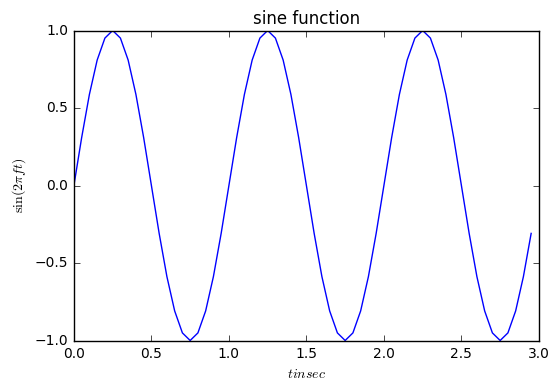

In [36]:
x = np.arange(0,3*1.,1./20)
y = np.sin(2*np.pi*1*x)

plt.plot(x,y)
plt.xlabel(r'$t in sec$')
plt.ylabel(r'$\sin(2\pi ft)$')
plt.title('sine function')

Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

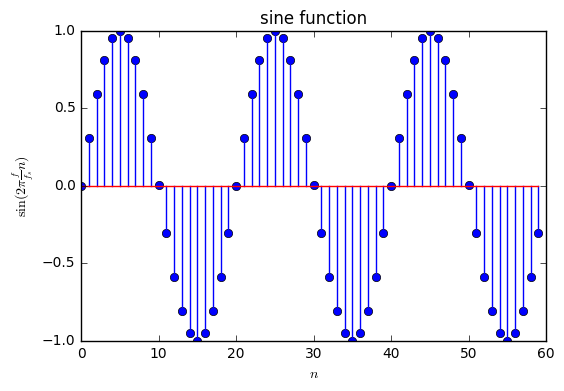

In [37]:
x = np.arange(0,3*1.,1./20)
y = np.sin(2*np.pi*1*x)

plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$\sin(2\pi \frac{f}{f_s}n)$')
plt.title('sine function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

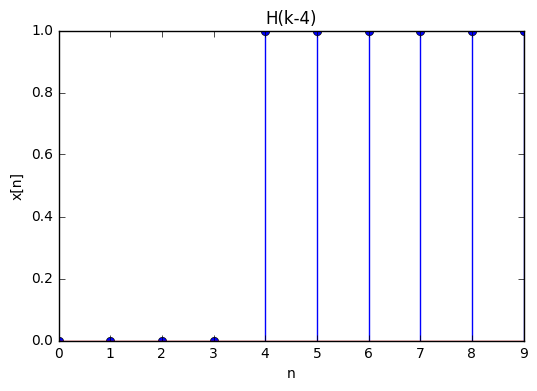

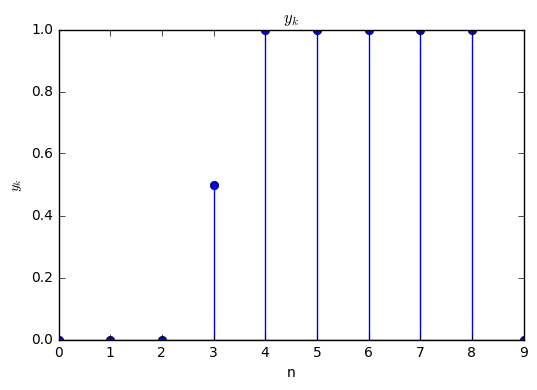

In [38]:
def step(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N,))
    s[n:N] = 1
    return s

x = step(4,10)

plt.figure()
plt.stem(x)
plt.title('H(k-4)')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


y = np.zeros((10,))
for i in range(9):
    y[i] = (x[i] + x[i+1])/2

plt.figure()
plt.stem(y)
plt.title('$y_k$')
plt.xlabel('n')
plt.ylabel('$y_k$')
plt.show()

**1.2** Propose a modification to obtain a causal version

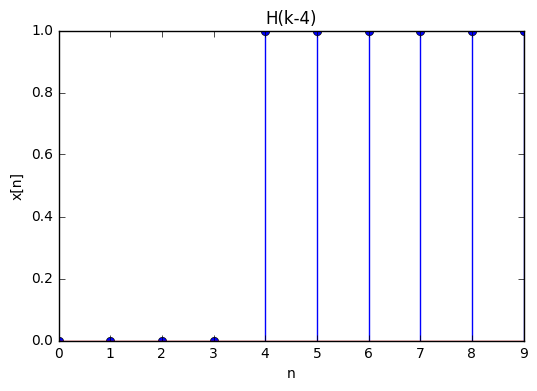

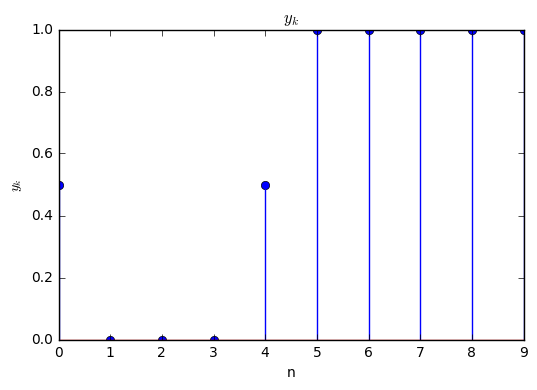

In [39]:
x = step(4,10)
plt.figure()
plt.stem(x)
plt.title('H(k-4)')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


y = np.zeros((10,))
for i in range(10):
    y[i] = (x[i] + x[i-1])/2

plt.figure()
plt.stem(y)
plt.title('$y_k$')
plt.xlabel('n')
plt.ylabel('$y_k$')
plt.show()

Comments on your observations

Causal system is "non anticipative" system so it should depend on only past and present values. so we define system as $y_k$ = $(x_k + x_{k-1})/2$

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



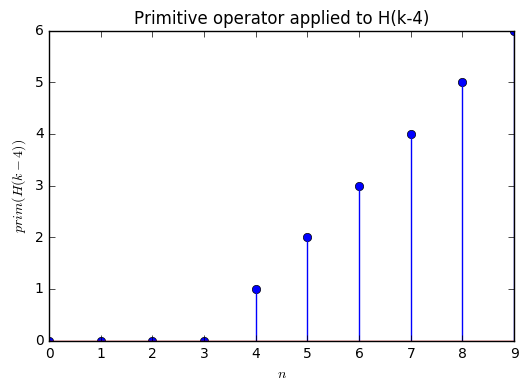

In [40]:
def prim(f):
    s = np.zeros((len(f),))
    s[0] = f[0]
    for i in range(1,len(f)):
        s[i] = f[i] +s[i-1]
    return s

w = prim(x)
plt.stem(w)
plt.title('Primitive operator applied to H(k-4)')
plt.xlabel(r'$n$')
plt.ylabel(r'$prim(H(k-4))$')

In [41]:
#The primitive operator applied on H(k-4) will add the discrete step function at each step and it gives an 
#ramp function as we are discretly integrating step function. 

In [42]:
def dirac(n=0, N=20):
    if n > N-1:
        raise ValueError('n should be in 0 to N-1')
    s = np.zeros((N, ))
    s[n] = 1
    return s


**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

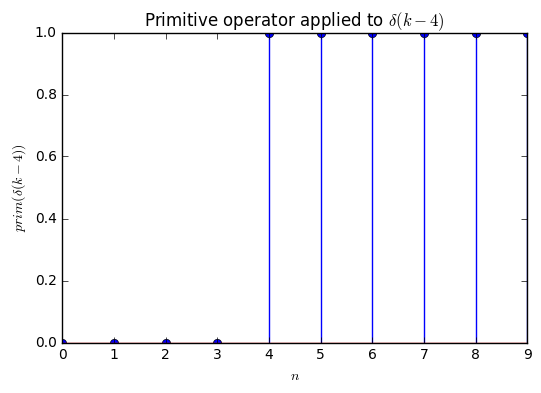

In [43]:
x1 = dirac(4,10)

g = prim(x1)
plt.stem(g)
plt.title('Primitive operator applied to $\delta (k-4)$')
plt.xlabel(r'$n$')
plt.ylabel(r'$prim(\delta(k-4))$')

In [44]:
#primitive operator when applied on impulse signal gives a step signal

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

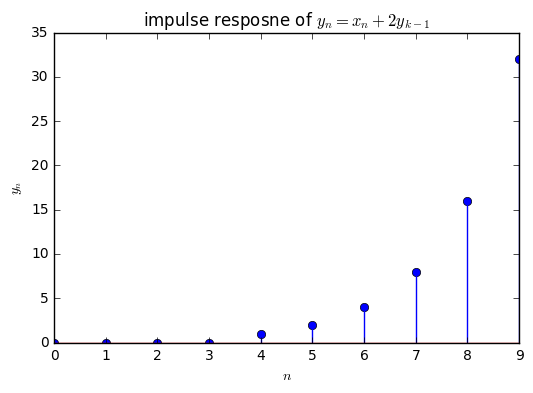

In [45]:

x2 = dirac(4,10)

y1 = np.zeros(10)
y1[0] = x2[0]

for i in range(1,10):
    y1[i] = x2[i] + 2*y1[i-1]


plt.stem(y1)
plt.xlabel(r'$n$')
plt.ylabel(r'$y_n$')
plt.title('impulse resposne of $ y_n = x_n + 2y_{k-1}$')

In [46]:
#The impulse response of above function gives a discrete rising exponential function. 
#As bounded input is not a bounded output (BIBO) this leads to instability.

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

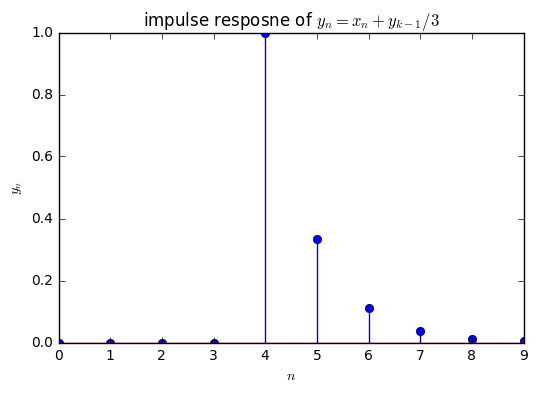

In [47]:
x3 = dirac(4,10)

y2 = np.zeros(10)
y2[0] = x3[0]

for i in range(10):
    y2[i] = x3[i] + y2[i-1]/3

plt.stem(y2)
plt.xlabel(r'$n$')
plt.ylabel(r'$y_n$')
plt.title('impulse resposne of $ y_n = x_n + y_{k-1}/3$')

The impulse response of above function gives a discrete decaying exponential function. 
As bounded input is a bounded output (BIBO) ,this system is stable

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


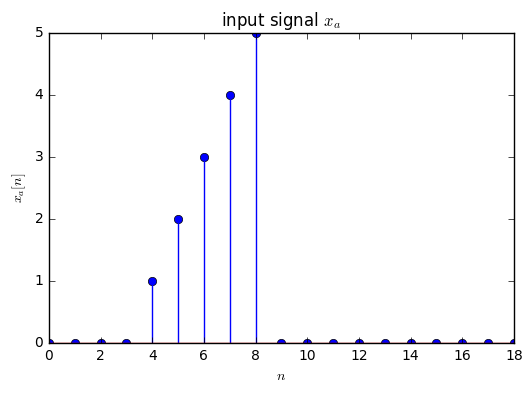

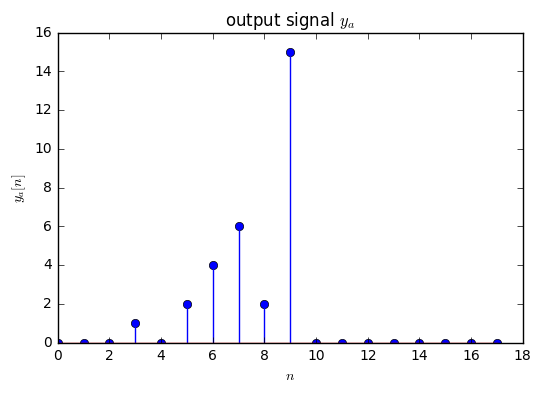

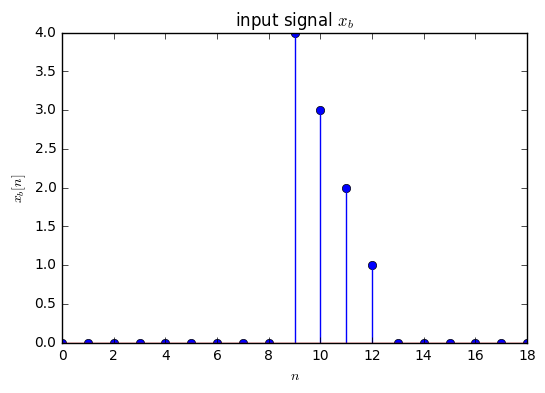

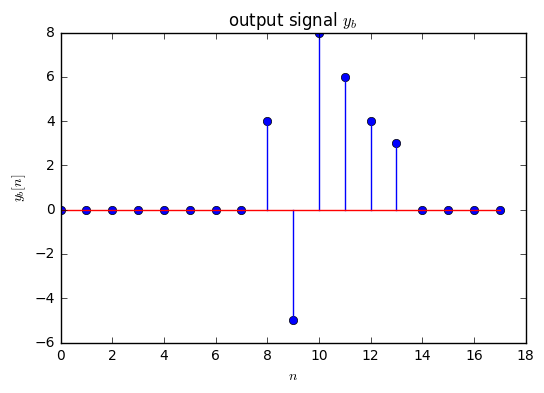

In [48]:
xa = np.zeros((19,))
xa[4:9] = np.linspace(1,5,num =5)

xb = np.zeros((19,))
xb[9:13] = np.linspace(4,1,num =4)

plt.figure()
plt.stem(xa)
plt.title('input signal $x_a$')
plt.xlabel('$n$')
plt.ylabel('$x_a[n]$')

ya = np.zeros((18,))
yb = np.zeros((18,))

for i in range(2,18):
    ya[i] = 3*xa[i-1]-2*xa[i] + xa[i+1]
    yb[i] = 3*xb[i-1]-2*xb[i] + xb[i+1]

plt.figure()
plt.stem(ya)
plt.title('output signal $y_a$')
plt.xlabel('$n$')
plt.ylabel('$y_a[n]$')


plt.figure()
plt.stem(xb)
plt.title('input signal $x_b$')
plt.xlabel('$n$')
plt.ylabel('$x_b[n]$')

plt.figure()
plt.stem(yb)
plt.title('output signal $y_b$')
plt.xlabel('$n$')
plt.ylabel('$y_b[n]$')

**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


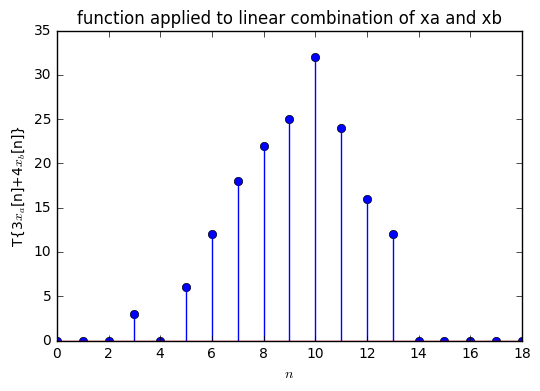

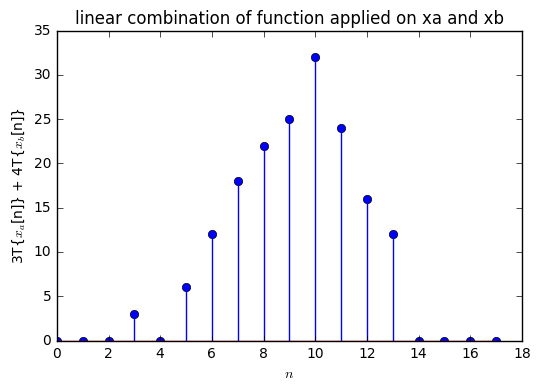

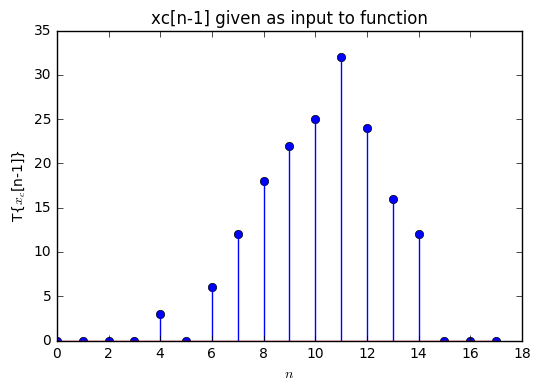

In [49]:
#Linear
#we will show T{a * xa[n] + b * xb[n]} = a* T{xa[n]} + b*T{xb[n]}
#T{x[n]} = 3x[n-1] - 2x[n] + x[n+1]

xc = np.zeros(19)
yc = np.zeros(19)

for i in range(19):
    xc[i]= 3*xa[i]+4*xb[i] # 3 and 4 are scaling factors so a * xa[n] + b * xb[n]
   

for i in range(18):
    yc[i] = 3*xc[i-1]-2*xc[i] + xc[i+1]  #applying a * xa[n] + b * xb[n] as input to function so T{a * xa[n] + b * xb[n]}
    
yab = 3*ya + 4*yb  #a* T{xa[n]} + b * T{xb[n]}

plt.figure()
plt.stem(yc)
plt.title('function applied to linear combination of xa and xb')
plt.xlabel('$n$')
plt.ylabel('T{3$x_a$[n]+4$x_b$[n]}')

plt.figure()
plt.stem(yab)
plt.title('linear combination of function applied on xa and xb')
plt.xlabel('$n$')
plt.ylabel('3T{$x_a$[n]} + 4T{$x_b$[n]}')

#therefore yc = yab Linear proved
#T{xa[n]+b*xb[n]} = a* T{xa[n]} + b*T{xb[n]}

#Time invariant
# we will show that yc[n-1] = T{xc[n-1]}

yc1 = np.zeros(18)
for i in range(2,18):
    yc1[i] = 3*xc[i-2]-2*xc[i-1] + xc[i]  #xc[n-1] given as input to function
plt.figure()
plt.stem(yc1)
plt.title('xc[n-1] given as input to function')
plt.xlabel('$n$')
plt.ylabel('T{$x_c$[n-1]}')

# we can see from the plot that T{$x_c$[n-1]} is equal to yc[n-1]
#so this is time invariant

In [50]:
#equation as convolution
#y[n] = x[n] * h[n] 
#where h[n] is the impulse response of the system
#h[n] = 3 * dirac(n-1) - 2 * dirac(n) + dirac(n+1)




**3.3** Propose a nonlinear/noninvariant system.

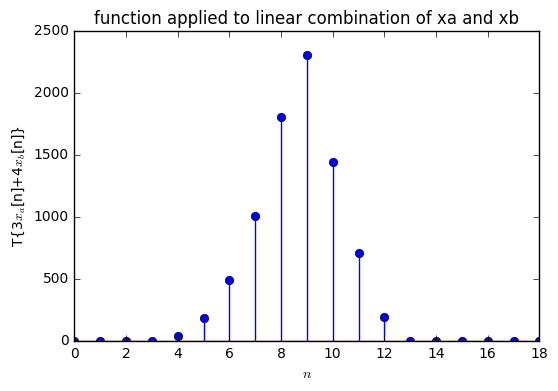

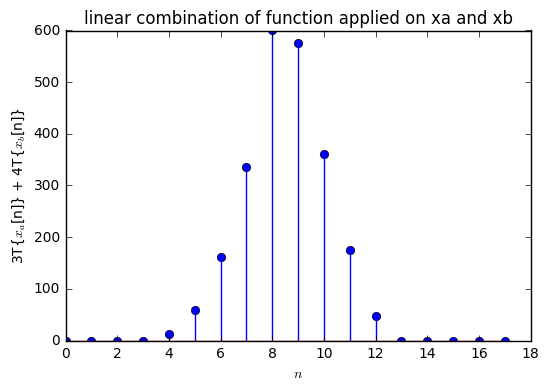

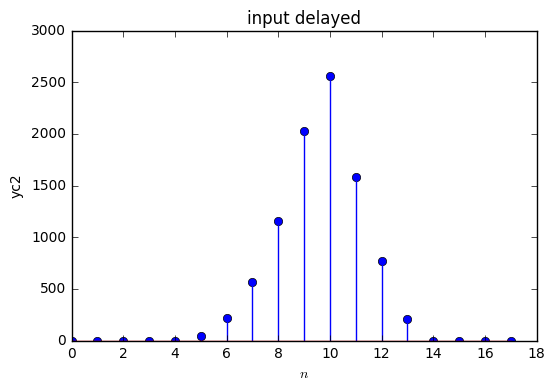

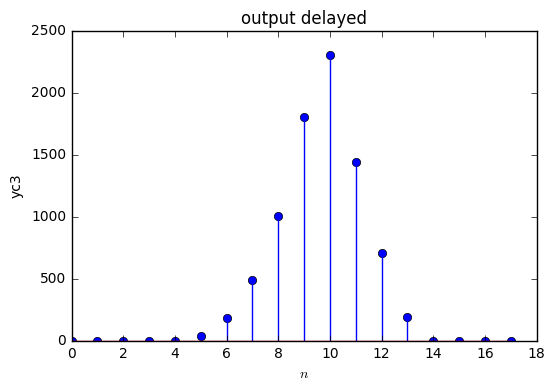

In [51]:
#Non-Linear/noninvariant system example 

#y[n] = n*x[n]^2 = T{x[n]}

for i in range(1,18):
    ya[i] = xa[i]**2 * i #nonlinear
    yb[i] = xb[i]**2 * i #non linear    
    
    
for i in range(1,18):
    xc[i]= 3*xa[i]+4*xb[i]   # 3 and 4 are scaling factors so a * xa[n] + b * xb[n]
    yc[i] =xc[i]**2 * i #applying a * xa[n] + b * xb[n] as input to function so T{a * xa[n] + b * xb[n]}
    
plt.figure()   
plt.stem(yc)
plt.xlabel('$n$') 
plt.ylabel('T{3$x_a$[n]+4$x_b$[n]}')
plt.title('function applied to linear combination of xa and xb') 
plt.figure()        

for i in range(1,18):
    yab[i]= 3*ya[i]+4*yb[i] #a* T{xa[n]} + b * T{xb[n]}
    
plt.stem(yab)
plt.xlabel('$n$') 
plt.ylabel('3T{$x_a$[n]} + 4T{$x_b$[n]}')
plt.title('linear combination of function applied on xa and xb') 
plt.figure()   

#therefore yc != yab Non-Linear proved
#T{xa[n]+b*xb[n]} != a* T{xa[n]} + b*T{xb[n]}

#Time noninvariant
# we will show that yc[n-1] != T{xc[n-1]}



yc2 = np.zeros(18)
yc3 = np.zeros(18)

for i in range(1,18):
    yc2[i]= xc[i-1]**2 * i  #xc[n-1] that is input is delayed
    yc3[i] =xc[i-1]**2 * (i-1)  # this is delay at output
plt.stem(yc2)
plt.xlabel('$n$') 
plt.ylabel('yc2')
plt.title('input delayed')

plt.figure()
plt.stem(yc3)
plt.xlabel('$n$') 
plt.ylabel('yc3')
plt.title('output delayed')


#so this is time noninvariant